In [1]:
import numpy as np
import sys
import os
sys.path.append(os.environ.get('OTF')+'/otf_engine')
import gp, env, struc, kernels, otf
sys.path.append(os.environ.get('OTF')+'/modules')
import qe_parsers, analyze_gp, parse_output_temp, otf_parser, calculate_rdf, \
    analyze_otf, crystals, activation_parser, analyze_md, otf_parser_v0, analyze_gp
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
import copy

# return to default and make the fontbigger
plt.rcParams.update(plt.rcParamsDefault)
font = {'size'   : 12}
plt.rc('font', **font)

# Make figure

In [2]:
file_name = '/Users/jonpvandermause/Research/GP/data/Melt_Runs/Al_Quench_OptHyp_2-24/otf_run.out'
otf_run = otf_parser_v0.OtfAnalysis(file_name)

In [3]:
# get otf times and msds
dft_times_plot = otf_run.dft_times[1:]
dft_temps_plot = []
dft_msds_plot = []
for time in dft_times_plot:
    ind = otf_run.times.index(time)
    dft_temps_plot.append(otf_run.temperatures[ind])
    dft_msds_plot.append(otf_run.msds[ind])

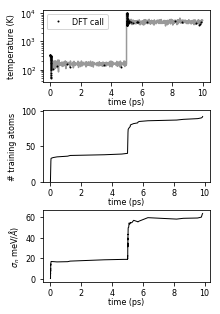

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(otf_run.times, otf_run.temperatures, 'k-',
         markersize=1, alpha=0.4)

ax1.set_yscale('log')
ax1.set_ylabel('temperature (K)', fontsize=8)
ax1.set_xlabel('time (ps)', fontsize=8, labelpad=0)
ax1.plot(dft_times_plot, dft_temps_plot, 'k.', MarkerSize=2,
         label='DFT call')
ax1.tick_params(labelsize=8)
ax1.legend(fontsize=8)

# ----------------------------
# part b: plot learning curve
# ----------------------------

ax2.set_ylabel('atoms added', fontsize=8)
ax2.set_xlabel('time (ps)', fontsize=8)
ax2.tick_params(labelsize=8)

ax2.plot(otf_run.dft_times, (np.arange(0, len(otf_run.dft_times), 1)), 'k-', linewidth=1)


ax2.set_ylabel('# training atoms', fontsize=8)
ax2.set_xlabel('time (ps)', fontsize=8, labelpad=0)
ax2.set_ylim(0, 101)
# ax2.legend(fontsize=8)

# ----------------------------
# part c: plot rdf
# ----------------------------

ax3.tick_params(labelsize=8)
ax3.plot(otf_run.dft_times, np.array(noise_hyps)*1e3, 'k-', linewidth=1, label='$\sigma_n$')
ax3.set_ylabel('$\sigma_n$ meV/$\AA$)', fontsize=8)
ax3.set_xlabel('time (ps)', fontsize=8, labelpad=0)
# ax3.legend(fontsize=8)

# # plot rdf
# ax3.plot(liq_rs, liq_rad_dist, 'k:', label='liquid rdf', linewidth=1)
# ax3.plot(sol_rs, sol_rad_dist, 'k-', label='solid rdf', linewidth=1)
# ax3.set_xlabel('r ($\AA$)', fontsize=8)
# ax3.set_ylabel('RDF', fontsize=8)
# ax3.set_xlim(1.5, 8)
# ax3.tick_params(labelsize=8)
# # ax1.axvline(5.4, color='k', linestyle=':', label='cutoff')

f.set_size_inches(3, 5)
f.subplots_adjust(hspace = 0.4)

plt.show()

f.savefig('/Users/jonpvandermause/Research/GP/otf/paper/Main/melt.pdf', format='pdf',bbox_inches='tight')

# Compute RDF

In [84]:
# calculate solid rdf
position_list = otf_run.position_list
cell = 8.092 * np.eye(3)
species = ['Al']*32
snaps = np.arange(10, 4500, 1)
cutoff = 8.092
bins = 500

sol_rs, sol_rad_dist, sol_atom_count = \
    calculate_rdf.calculate_rdf(position_list, cell, species, snaps, cutoff, bins)

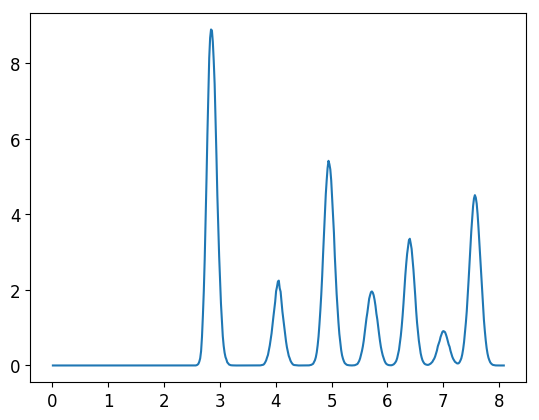

In [85]:
# plot rdf
f, (ax1) = plt.subplots(1, 1)
ax1.plot(sol_rs, sol_rad_dist, label='solid rdf')
plt.show()

In [108]:
# calculate liquid rdf
position_list = otf_run.position_list
cell = 8.092 * np.eye(3)
species = ['Al']*32
snaps = np.arange(6000, 9999, 1)
cutoff = 8.092
bins = 70

liq_rs, liq_rad_dist, liq_atom_count = \
    calculate_rdf.calculate_rdf(position_list, cell, species, snaps, cutoff, bins)

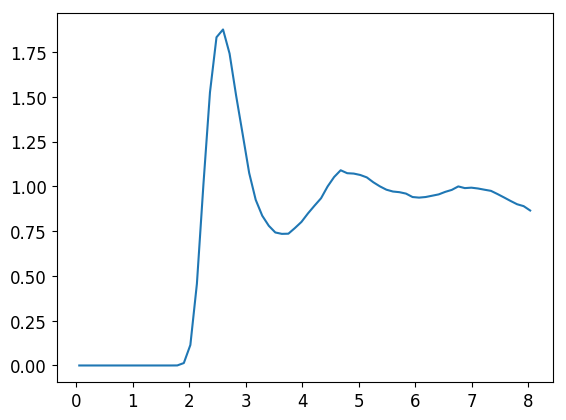

In [109]:
# plot rdf
f, (ax1) = plt.subplots(1, 1)
ax1.plot(liq_rs, liq_rad_dist, label='liq rdf')
plt.show()

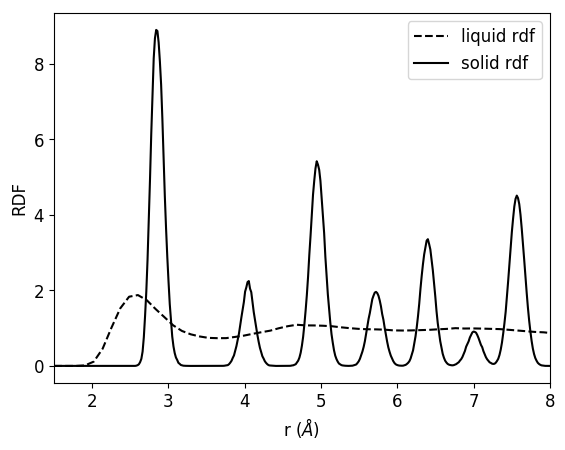

In [121]:
# plot rdf
f, (ax1) = plt.subplots(1, 1)
ax1.plot(liq_rs, liq_rad_dist, 'k--', label='liquid rdf')
ax1.plot(sol_rs, sol_rad_dist, 'k-', label='solid rdf')
ax1.set_xlabel('r ($\AA$)')
ax1.set_ylabel('RDF')
ax1.set_xlim(1.5, 8)
# ax1.axvline(5.4, color='k', linestyle=':', label='cutoff')
ax1.legend()
plt.show()

In [12]:
noise_hyps = [n[-1] for n in otf_run.gp_hyp_list]

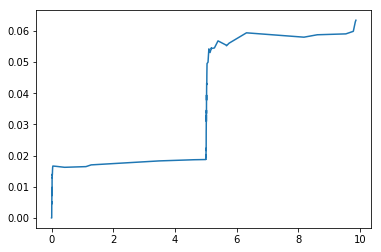

In [13]:
plt.plot(otf_run.dft_times, noise_hyps, '-')
plt.show()